# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [74]:
! git clone https://github.com/ds4e/EDA

fatal: destination path 'EDA' already exists and is not an empty directory.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Please see work done on paper uploaded to GitHub repo as pdf, thanks!**

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# Part 1
foreign_gifts = pd.read_csv("/content/EDA/assignment/data/ForeignGifts_edu.csv")
foreign_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


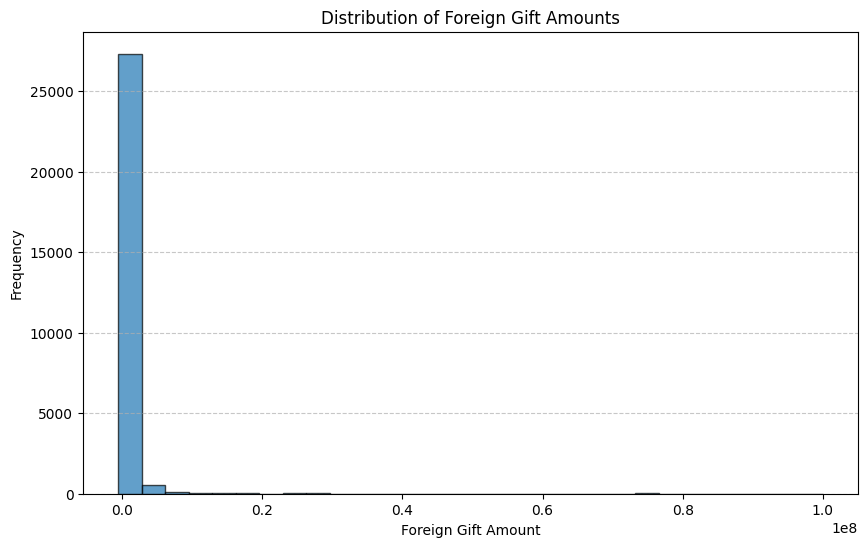

In [77]:
# Part 2

plt.figure(figsize=(10, 6))
plt.hist(foreign_gifts['Foreign Gift Amount'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amounts')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Description of what I see: The histogram shows a very heavily skewed distribution of foreign gift amounts.
## 50% of foreign gift amounts are between 5700 and 376142.
## Most foreign gift amounts are on the lower end.
## That is what it appears to show, but really the values are poorly scaled.

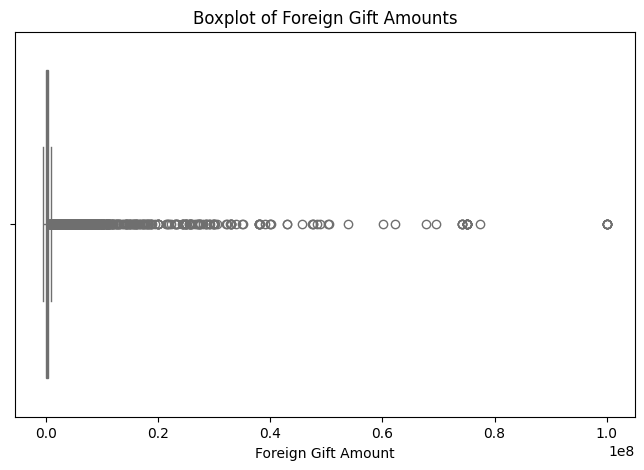

In [78]:
# Boxplot of this
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=foreign_gifts['Foreign Gift Amount'], color='skyblue')

plt.xlabel('Foreign Gift Amount')
plt.title('Boxplot of Foreign Gift Amounts')

plt.show()

In [79]:
foreign_gifts['Foreign Gift Amount'].describe()

## 50% of foreign gifts are between 5700 and 376142.

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [80]:
# Part 3
foreign_gifts['Gift Type'].value_counts(normalize = True)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [81]:
foreign_gifts.groupby('Gift Type')['Foreign Gift Amount'].describe()


,count,mean,std,min,25%,50%,75%,max
Gift Type,,,,,,,,
Contract,17274.0,6.257945e+05,3.768217e+06,-537770.0,13757.5,110000.0,366000.0,99999999.0
Monetary Gift,10936.0,5.281504e+05,2.086487e+06,1.0,250.0,50000.0,400000.0,48842186.0
Real Estate,11.0,1.335265e+06,1.412071e+06,39456.0,370574.5,667555.0,2121736.0,4312000.0


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


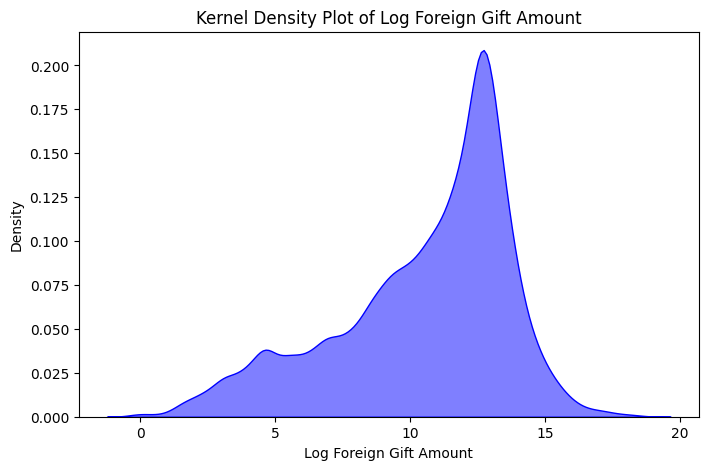

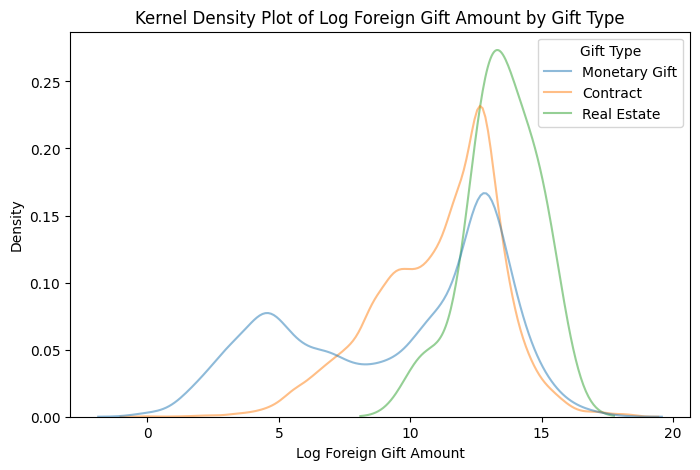

In [82]:
# Part 4
# Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?

import numpy as np

# Replace non-positive values with NaN
foreign_gifts['Log Foreign Gift Amount'] = np.where(
    foreign_gifts['Foreign Gift Amount'] > 0,
    np.log(foreign_gifts['Foreign Gift Amount']),
    np.nan
)

# Kernel Density Plot of Log Foreign Gift Amount
plt.figure(figsize=(8, 5))
sns.kdeplot(foreign_gifts['Log Foreign Gift Amount'].dropna(), fill=True, color='blue', alpha=0.5)
plt.xlabel('Log Foreign Gift Amount')
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.show()

# Kernel Density Plot of Log Foreign Gift Amount Conditional on Gift Type
plt.figure(figsize=(8, 5))
sns.kdeplot(data=foreign_gifts,x = "Log Foreign Gift Amount", hue="Gift Type", fill=False, alpha=0.5,common_norm=False)
plt.xlabel('Log Foreign Gift Amount')
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.show()

# Pattern that I am noticing is that real estate types of foreign gifts tend to be the most expensive, though, it is a small proportion of the dataset.
# Other thing to note is that the original values were poorly scaled.
# Now the values are smoothed with log transformation.
# This suggests concentration of moderately large foreign gift amounts

In [83]:
# Part 5

# What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
# Top 15 countries in terms of number of foreign gifts given
foreign_gifts['Country of Giftor'].value_counts().head(15)

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [84]:
# Top 15 countries in terms of amount of foreign gifts given

foreign_gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [85]:
# Part 6

# What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

# Top 15 institutions in terms of total amount of money received.
foreign_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


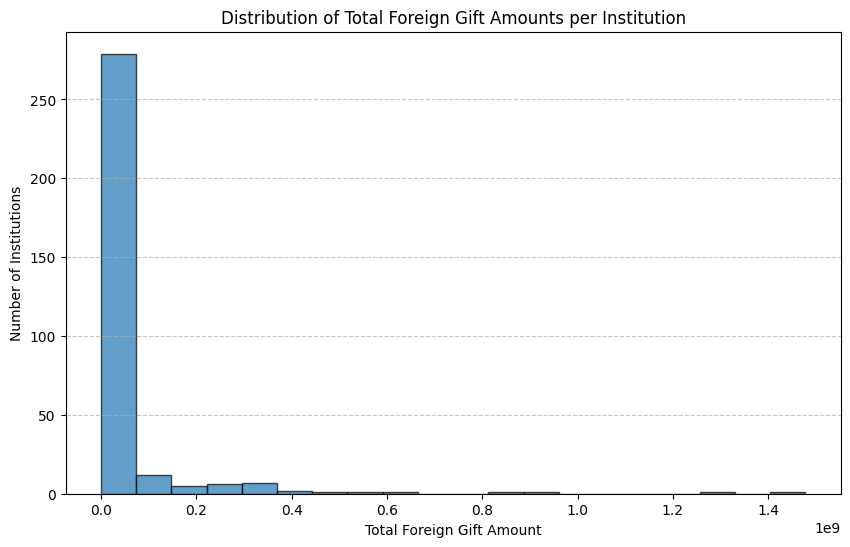

In [86]:
institution_gift_totals = foreign_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(10, 6))
plt.hist(institution_gift_totals, bins=20, edgecolor='black', alpha=0.7)


# Add labels and title
plt.xlabel('Total Foreign Gift Amount')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Foreign Gift Amounts per Institution')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Improves readability

plt.show()


In [87]:
# Part 7

# Top 15 giftors in money total

foreign_gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [98]:
# Part 1

drilling = pd.read_csv("/content/EDA/assignment/data/drilling_rigs.csv")
drilling.info()

# There are 632 observations and 10 variables.

# Numeric variables do not seem to be correctly read in by pandas. The columns below need to be converted to numeric:

'''
'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)', 'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
and 'Active Well Service Rig Count (Number of Rigs)'
'''

# They all say "number of rigs" so they should be numeric, but currently object because NAs are entered as "Not Available"

# As a result, the data needs to be cleaned by replacing the "Not Available" with np.nan and then converting to numeric

# We should also have date time variable for month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

In [101]:
drilling.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [103]:
cols_to_fix = [
    'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
    'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
    'Active Well Service Rig Count (Number of Rigs)'
]

# Replace "Not Available" with NaN and convert to numeric
drilling[cols_to_fix] = drilling[cols_to_fix].replace("Not Available", np.nan).apply(pd.to_numeric)

In [105]:
drilling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                                                                                       Non-Null Count  Dtype         
---  ------                                                                                       --------------  -----         
 0   Month                                                                                        623 non-null    object        
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64         
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64         
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   448 non-null    float64       
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 448 non-null    float64

In [102]:
# Part 2

drilling['time'] = pd.to_datetime(drilling['Month'], format='mixed')

[Text(0.5, 1.0, 'Total Number of Rigs Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Rigs')]

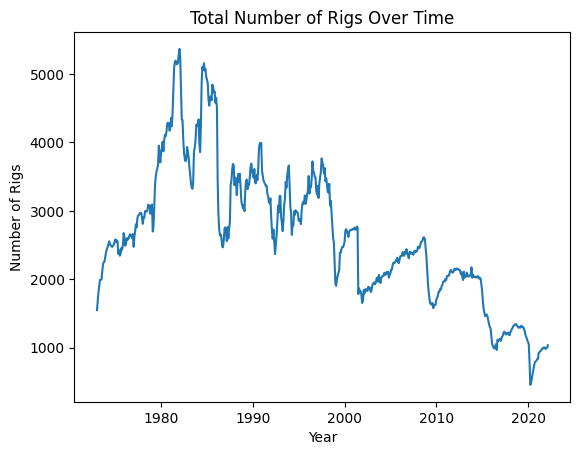

In [115]:
# Part 3

# Let's look at Active Well Service Rig Count (Number of Rigs), which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

sns.lineplot(data=drilling,x='time',y='Active Well Service Rig Count (Number of Rigs)').set(title='Total Number of Rigs Over Time',
                                                             xlabel='Year',ylabel='Number of Rigs')

# I see that they have declined over time!

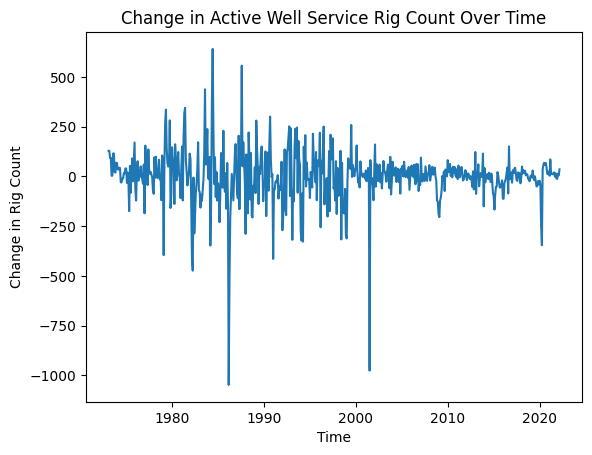

In [119]:
# Part 4

# Instead of levels, we want to look at change over time. Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot it over time. Describe what you see.

diff = drilling['Active Well Service Rig Count (Number of Rigs)'].diff()

sns.lineplot(x=drilling['time'][1:],y=diff)

plt.title("Change in Active Well Service Rig Count Over Time")  # Title
plt.xlabel("Time")  # X-axis label
plt.ylabel("Change in Rig Count")  # Y-axis label

plt.show()  # Display the plot


*   I see a high degree of volatility in total number of rigs overtime, especially before 2000. Post-2000 it has been a little less volatile









In [122]:
drilling.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0,1973-01-01
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0,1973-02-01
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0,1973-03-01
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0,1973-04-01
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0,1973-05-01


In [131]:
# Part 5

# The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series

melted_drilling = drilling.melt(id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'], var_name='Rig Location', value_name='Rig Count')

melted_drilling['Rig Location'] = melted_drilling['Rig Location'].replace({
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)': 'Onshore Rigs',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)': 'Offshore Rigs'
})

melted_drilling.head()

,time,Rig Location,Rig Count
0,1973-01-01,Onshore Rigs,1120
1,1973-02-01,Onshore Rigs,1037
2,1973-03-01,Onshore Rigs,959
3,1973-04-01,Onshore Rigs,914
4,1973-05-01,Onshore Rigs,974


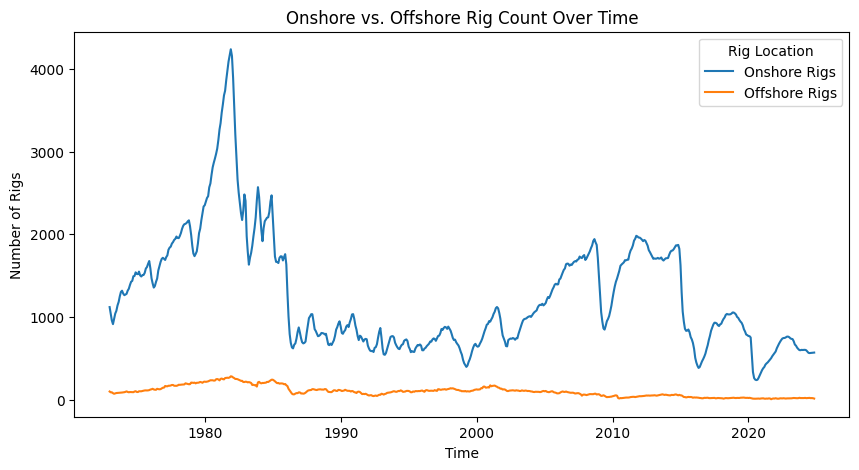

In [133]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=melted_drilling, x='time', y='Rig Count', hue='Rig Location')

plt.title("Onshore vs. Offshore Rig Count Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.legend(title="Rig Location")
plt.show()